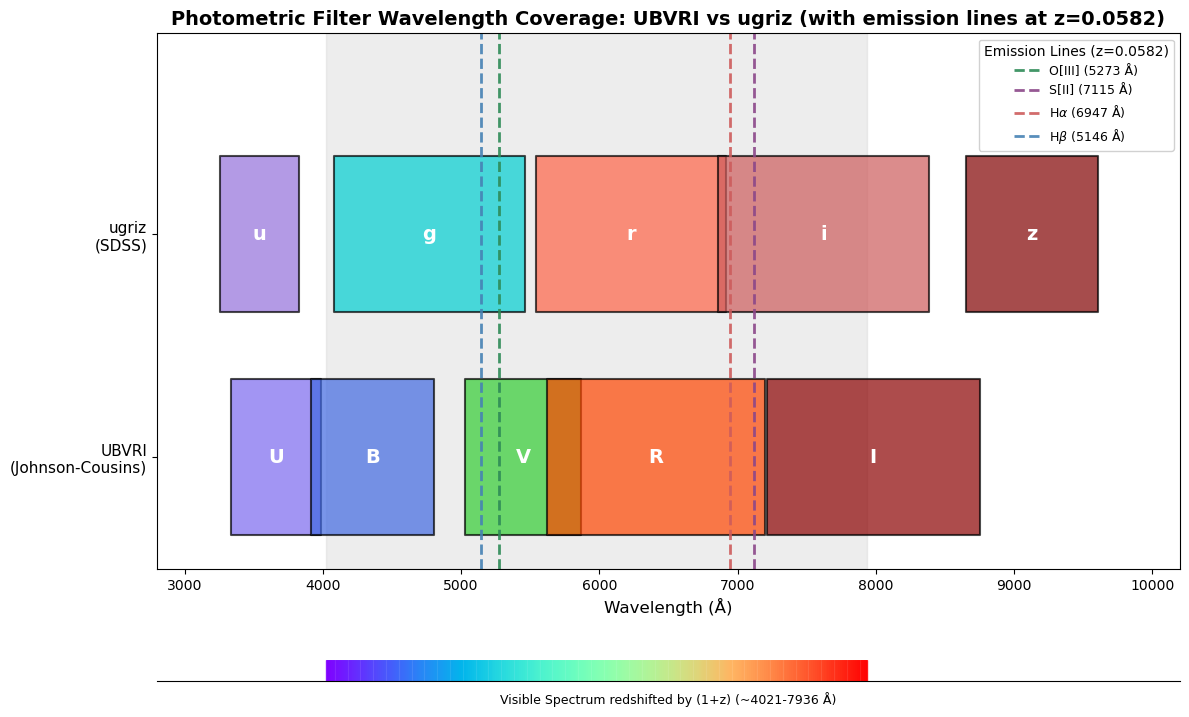


UBVRI (Johnson-Cousins) Filter System
Filter   Center (Å)      FWHM (Å)     Range (Å)           
-----------------------------------------------------------------
U        3660            650          3335 - 3985
B        4360            890          3915 - 4805
V        5450            840          5030 - 5870
R        6410            1580         5620 - 7200
I        7980            1540         7210 - 8750

ugriz (SDSS) Filter System
Filter   Center (Å)      FWHM (Å)     Range (Å)           
-----------------------------------------------------------------
u        3540            570          3255 - 3825
g        4770            1380         4080 - 5460
r        6230            1370         5545 - 6915
i        7620            1530         6855 - 8385
z        9130            950          8655 - 9605

Redshifted Emission Lines (z = 0.0582)
Line         Rest (Å)        Observed (Å)   
-----------------------------------------------------------------
O[III]       4983.00         527

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# =============================================================================
# UBVRI and ugriz Filter Wavelength Coverage (in Angstroms)
# =============================================================================
# References:
# - UBVRI (Johnson-Cousins): Bessell (1990), lco.global, vikdhillon.staff.shef.ac.uk
# - ugriz (SDSS): Fukugita et al. (1996), cfht.hawaii.edu, SDSS documentation

# Emission lines in Angstroms
OIII = 4983
SII = 6724
H_ALPH = 6564.61
H_BETA = 4862.68

z = 0.0582

# Emission line data for plotting
emission_lines = {
    r'O[III]': OIII,
    r'S[II]': SII,
    r'H$\alpha$': H_ALPH,
    r'H$\beta$': H_BETA,
}

# Filter data: (central wavelength in Å, FWHM in Å)
# UBVRI - Johnson-Cousins system (converted from nm to Å)
ubvri = {
    'U': (3660, 650),   # Ultraviolet
    'B': (4360, 890),   # Blue
    'V': (5450, 840),   # Visual (green-yellow)
    'R': (6410, 1580),  # Red (Cousins R)
    'I': (7980, 1540),  # Near-Infrared (Cousins I)
}

# ugriz - SDSS photometric system (converted from nm to Å)
ugriz = {
    'u': (3540, 570),   # Ultraviolet
    'g': (4770, 1380),  # Green
    'r': (6230, 1370),  # Red
    'i': (7620, 1530),  # Near-Infrared
    'z': (9130, 950),   # Far red / NIR
}

# Approximate colors for each filter band (for visualization)
ubvri_colors = {
    'U': '#7B68EE',   # Violet/UV
    'B': '#4169E1',   # Blue
    'V': '#32CD32',   # Green
    'R': '#FF4500',   # Red-Orange
    'I': '#8B0000',   # Dark Red
}

ugriz_colors = {
    'u': '#9370DB',   # Medium Purple
    'g': '#00CED1',   # Cyan-ish green
    'r': '#FF6347',   # Tomato red
    'i': '#CD5C5C',   # Indian red
    'z': '#800000',   # Maroon
}

# Colors for emission lines (muted, less fluorescent)
line_colors = {
    r'O[III]': '#2E8B57',   # Sea green
    r'S[II]': '#8B4789',    # Muted magenta
    r'H$\alpha$': '#CD5C5C', # Indian red
    r'H$\beta$': '#4682B4',  # Steel blue
}

# Create the figure with more bottom space
fig, ax = plt.subplots(figsize=(12, 7))

# Plot UBVRI filters (lower row, y = 0.5)
y_ubvri = 0.5
for name, (center, fwhm) in ubvri.items():
    left = center - fwhm/2
    right = center + fwhm/2
    ax.fill_betweenx([y_ubvri - 0.35, y_ubvri + 0.35], left, right, 
                     alpha=0.7, color=ubvri_colors[name], edgecolor='black', linewidth=1.5)
    ax.text(center, y_ubvri, name, ha='center', va='center', fontsize=14, fontweight='bold', color='white')

# Plot ugriz filters (upper row, y = 1.5)
y_ugriz = 1.5
for name, (center, fwhm) in ugriz.items():
    left = center - fwhm/2
    right = center + fwhm/2
    ax.fill_betweenx([y_ugriz - 0.35, y_ugriz + 0.35], left, right, 
                     alpha=0.7, color=ugriz_colors[name], edgecolor='black', linewidth=1.5)
    ax.text(center, y_ugriz, name, ha='center', va='center', fontsize=14, fontweight='bold', color='white')

# Plot redshifted emission lines with legend
emission_line_handles = []
for i, (name, wavelength) in enumerate(emission_lines.items()):
    redshifted_wavelength = (1 + z) * wavelength
    line = ax.axvline(redshifted_wavelength, color=line_colors[name], linestyle='--', linewidth=2, alpha=0.9,
                      label=f'{name} ({redshifted_wavelength:.0f} Å)')
    emission_line_handles.append(line)

# Add legend for emission lines
ax.legend(handles=emission_line_handles, loc='upper right', fontsize=9, title=f'Emission Lines (z={z})', 
          title_fontsize=10, framealpha=0.9)

# Formatting
ax.set_xlim(2800, 10200)
ax.set_ylim(0, 2.4)
ax.set_xlabel('Wavelength (Å)', fontsize=12)
ax.set_yticks([0.5, 1.5])
ax.set_yticklabels(['UBVRI\n(Johnson-Cousins)', 'ugriz\n(SDSS)'], fontsize=11)
ax.set_title(f'Photometric Filter Wavelength Coverage: UBVRI vs ugriz (with emission lines at z={z})', fontsize=14, fontweight='bold')

# Add very transparent light grey fill for visible spectrum region (behind the filter rectangles)
ax.fill_betweenx([0, 2.4], 3800 * (1 + z), 7500 * (1 + z), color='lightgray', alpha=0.4, zorder=0)
# ax.text(3800 * (1 + z), -0.05, '3800 Å', ha='center', va='top', fontsize=8, color='gray')
# ax.text(7500 * (1 + z), -0.05, '7500 Å', ha='center', va='top', fontsize=8, color='gray')

plt.tight_layout()
plt.subplots_adjust(bottom=0.18)

# Add a wavelength reference bar showing approximate visible spectrum
# Get the position of the main axes after tight_layout
pos = ax.get_position()
ax_spectrum = fig.add_axes([pos.x0, 0.02, pos.width, 0.03])  # Align with main plot

# Set the same x limits first
ax_spectrum.set_xlim(2800, 10200)

# Visible spectrum in Angstroms (approximately 3800-7500 Å), redshifted by (1+z)
visible_start = 3800 * (1 + z)
visible_end = 7500 * (1 + z)
wavelengths = np.linspace(visible_start, visible_end, 500)

# Create a simple rainbow gradient - violet at short wavelengths, red at long wavelengths
colors = plt.cm.rainbow(np.linspace(0, 1, len(wavelengths)))
for i in range(len(wavelengths)-1):
    ax_spectrum.axvspan(wavelengths[i], wavelengths[i+1], color=colors[i], alpha=0.8)

ax_spectrum.set_xticks([])
ax_spectrum.set_yticks([])
ax_spectrum.set_xlabel(f'Visible Spectrum redshifted by (1+z) (~{visible_start:.0f}-{visible_end:.0f} Å)', fontsize=9, labelpad=8)
ax_spectrum.spines['top'].set_visible(False)
ax_spectrum.spines['right'].set_visible(False)
ax_spectrum.spines['left'].set_visible(False)

plt.show()

# Print filter details
print("\n" + "="*65)
print("UBVRI (Johnson-Cousins) Filter System")
print("="*65)
print(f"{'Filter':<8} {'Center (Å)':<15} {'FWHM (Å)':<12} {'Range (Å)':<20}")
print("-"*65)
for name, (center, fwhm) in ubvri.items():
    print(f"{name:<8} {center:<15.0f} {fwhm:<12.0f} {center-fwhm/2:.0f} - {center+fwhm/2:.0f}")

print("\n" + "="*65)
print("ugriz (SDSS) Filter System")
print("="*65)
print(f"{'Filter':<8} {'Center (Å)':<15} {'FWHM (Å)':<12} {'Range (Å)':<20}")
print("-"*65)
for name, (center, fwhm) in ugriz.items():
    print(f"{name:<8} {center:<15.0f} {fwhm:<12.0f} {center-fwhm/2:.0f} - {center+fwhm/2:.0f}")

print("\n" + "="*65)
print(f"Redshifted Emission Lines (z = {z})")
print("="*65)
print(f"{'Line':<12} {'Rest (Å)':<15} {'Observed (Å)':<15}")
print("-"*65)
for name, wavelength in emission_lines.items():
    print(f"{name:<12} {wavelength:<15.2f} {(1+z)*wavelength:<15.2f}")

In [2]:
# Constants (from main.ipynb)
OIII = 4983
SII = 6724 
H_ALPHA = 6564.61
H_BETA = 4862.68
LINEWIDTH = 0.5
LAMBDAS_TO_IGNORE_WIDTH = 180
z = 0.0582

def get_lam_bounds(emmited_lam: float, width: float) -> tuple[float, float]:
    """Get observed wavelength bounds centered on an emitted wavelength."""
    obs_lam = emmited_lam * (1 + z)
    left = obs_lam - width / 2
    right = obs_lam + width / 2
    return left, right

def plot_vert_emission_lines(
    ions: dict[str, float] | None, 
    plot_x_bounds: tuple[float, float] | None = None,
    fill_between_bounds: tuple[float, float] | None = None,
    fill_between_label: str | None = None,
    fill_between_opacity: float = 0.5,
    vlines_cmap = None,
) -> None:
    """Plot vertical emission lines with optional fill between."""
    if vlines_cmap is None:
        vlines_cmap = plt.cm.tab10
    if ions is None:
        return
    for i, (name, emission_lam) in enumerate(ions.items()):
        if plot_x_bounds is None or (plot_x_bounds[0] < emission_lam * (1+z) < plot_x_bounds[1]):
            plt.axvline(
                emission_lam * (1+z), linestyle='--', lw=LINEWIDTH,
                color=vlines_cmap(i), label=name
            )
        if fill_between_bounds is not None:
            if fill_between_label is None:
                plt.axvspan(
                    fill_between_bounds[0],
                    fill_between_bounds[1],
                    color='lightgrey', alpha=fill_between_opacity
                )
            else:
                plt.axvspan(
                    fill_between_bounds[0],
                    fill_between_bounds[1],
                    color='lightgrey', alpha=fill_between_opacity,
                    label=fill_between_label
                )
    plt.xlim(plot_x_bounds)

In [3]:
def plot_difference_spectra(
    lam: np.ndarray | None = None,
    adjusted_01_flux: np.ndarray | None = None,
    adjusted_01_err: np.ndarray | None = None,
    adjusted_15_flux: np.ndarray | None = None,
    adjusted_15_err: np.ndarray | None = None,
    adjusted_21_flux: np.ndarray | None = None,
    adjusted_21_err: np.ndarray | None = None,
    adjusted_22_flux: np.ndarray | None = None,
    adjusted_22_err: np.ndarray | None = None,
    data: tuple | None = None,
    # Plot configuration
    plot_width: float = 400,
    plot_centre: float | None = None,
    vertical_lines: dict[str, float] | None = None,
    fill_between_width: float | None = None,
    fill_between_opacity: float = 0.2,
    y_lim: tuple[float, float] | None = None,
    diff_year: int = 2001,
    figsize: tuple[float, float] = (12, 5),
    # Overplot H_alpha on H_beta
    overplot_h_alpha_on_h_beta: bool = False,
    # Calibration parameters (used when adjusted fluxes are None)
    bin_width_01: float = 15,
    poly_degree_01: float = 15,
    bin_width_others: float = 50,
    poly_degree_others: float = 6,
) -> tuple[dict, dict]:
    """
    Calculate and plot difference spectra.
    
    Parameters
    ----------
    lam : np.ndarray, optional
        Wavelength array. If None, will be obtained from get_data().
    adjusted_01_flux, adjusted_01_err : np.ndarray, optional
        Adjusted flux and error for 2001. If None, calculated via adjust_calibration().
    adjusted_15_flux, adjusted_15_err : np.ndarray, optional
        Adjusted flux and error for 2015. If None, uses raw flux15 from data.
    adjusted_21_flux, adjusted_21_err : np.ndarray, optional
        Adjusted flux and error for 2021. If None, calculated via adjust_calibration().
    adjusted_22_flux, adjusted_22_err : np.ndarray, optional
        Adjusted flux and error for 2022. If None, calculated via adjust_calibration().
    data : tuple, optional
        Pre-loaded data tuple from get_data(). If None, get_data() will be called.
    plot_width : float, default=400
        Width of the plot in Angstroms.
    plot_centre : float, optional
        Centre of the plot (in emitted wavelength). If None, defaults to H_ALPHA.
    vertical_lines : dict[str, float], optional
        Dictionary of {label: emitted_wavelength} for vertical dashed lines.
        If None, defaults to H_ALPHA and S[II] when centered on H_ALPHA,
        or H_BETA and O[III] when centered on H_BETA.
    fill_between_width : float, optional
        Width for the grey fill region. Defaults to 0.9 * LAMBDAS_TO_IGNORE_WIDTH.
    fill_between_opacity : float, default=0.2
        Opacity for the fill region.
    y_lim : tuple[float, float], optional
        Y-axis limits.
    diff_year : int, default=2001
        Year to subtract from (for labels).
    figsize : tuple[float, float], default=(12, 5)
        Figure size.
    overplot_h_alpha_on_h_beta : bool, default=False
        If True, creates an additional plot showing H_alpha spectra shifted to 
        align with H_beta wavelength range for direct comparison.
    bin_width_01, poly_degree_01 : float
        Parameters for adjust_calibration for year 2001.
    bin_width_others, poly_degree_others : float
        Parameters for adjust_calibration for years 2021 and 2022.
        
    Returns
    -------
    diff_fluxes : dict
        Dictionary with keys '15', '21', '22' containing the difference fluxes.
    diff_errs : dict
        Dictionary with keys '15', '21', '22' containing the difference errors.
    """
    # Import here to avoid circular imports if this is run standalone
    import sys
    sys.path.insert(0, '/Users/o_thorp/Downloads/my_stuff/Uni/other/scholarships/denison_2026/oli')
    
    # If no adjusted fluxes provided, calculate them
    need_calibration = any(x is None for x in [
        adjusted_01_flux, adjusted_15_flux, adjusted_21_flux, adjusted_22_flux
    ])
    
    if need_calibration:
        # Import adjust_calibration and get_data from main module
        # For now, we'll import from notebook context or define inline
        try:
            from main import adjust_calibration, get_data
        except ImportError:
            # If running in notebook, these should be in namespace
            # We'll need to run main.ipynb cells first or paste the functions
            raise ImportError(
                "adjust_calibration and get_data not found. "
                "Please run the relevant cells from main.ipynb first, "
                "or provide pre-calculated adjusted fluxes."
            )
        
        # Get data if not provided
        if data is None:
            data = get_data(plot_resampled_and_blurred=False)
        
        lam_data, (data01, data15, data21, data22) = data
        flux15, err15 = data15
        
        if lam is None:
            lam = lam_data
        
        # Calculate adjusted fluxes if not provided
        if adjusted_01_flux is None:
            _, adjusted_01_flux, adjusted_01_err = adjust_calibration(
                data=data, year_to_change="2001", 
                bin_width=bin_width_01, poly_degree=poly_degree_01,
                plot_ratio_selection=False, plot_poly_ratio=False, plot_adjusted=False
            )
        
        if adjusted_15_flux is None:
            adjusted_15_flux, adjusted_15_err = flux15, err15
        
        if adjusted_21_flux is None:
            _, adjusted_21_flux, adjusted_21_err = adjust_calibration(
                data=data, year_to_change="2021",
                bin_width=bin_width_others, poly_degree=poly_degree_others,
                plot_ratio_selection=False, plot_poly_ratio=False, plot_adjusted=False
            )
        
        if adjusted_22_flux is None:
            _, adjusted_22_flux, adjusted_22_err = adjust_calibration(
                data=data, year_to_change="2022",
                bin_width=bin_width_others, poly_degree=poly_degree_others,
                plot_ratio_selection=False, plot_poly_ratio=False, plot_adjusted=False
            )
    
    # Calculate difference spectra
    diff_15_01 = adjusted_15_flux - adjusted_01_flux
    diff_21_01 = adjusted_21_flux - adjusted_01_flux
    diff_22_01 = adjusted_22_flux - adjusted_01_flux
    
    diff_15_01_err = np.sqrt(adjusted_01_err**2 + adjusted_15_err**2)
    diff_21_01_err = np.sqrt(adjusted_01_err**2 + adjusted_21_err**2)
    diff_22_01_err = np.sqrt(adjusted_01_err**2 + adjusted_22_err**2)
    
    # Set defaults
    if plot_centre is None:
        plot_centre = H_ALPHA
    
    if fill_between_width is None:
        fill_between_width = 0.9 * LAMBDAS_TO_IGNORE_WIDTH
    
    # Set default vertical lines based on plot centre
    if vertical_lines is None:
        if abs(plot_centre - H_ALPHA) < 100:
            vertical_lines = {"H_ALPHA": H_ALPHA, "S[II]": SII}
        elif abs(plot_centre - H_BETA) < 100:
            vertical_lines = {"H_BETA": H_BETA, "O[III]": OIII}
        else:
            vertical_lines = {}
    
    # Create the plot
    plt.figure(figsize=figsize)
    plt.plot(lam, diff_15_01, alpha=0.7, color='black', label=f'2015 - {diff_year}', lw=LINEWIDTH)
    plt.plot(lam, diff_21_01, alpha=0.7, color='red', label=f'2021 - {diff_year}', lw=LINEWIDTH)
    plt.plot(lam, diff_22_01, alpha=0.7, color='blue', label=f'2022 - {diff_year}', lw=LINEWIDTH)
    
    plot_bounds = get_lam_bounds(plot_centre, plot_width)
    fill_bounds = get_lam_bounds(plot_centre, fill_between_width)
    
    plot_vert_emission_lines(
        vertical_lines, plot_bounds,
        fill_between_bounds=fill_bounds,
        fill_between_opacity=fill_between_opacity
    )
    
    if y_lim is not None:
        plt.ylim(y_lim)
    
    plt.xlabel("Wavelength (Å)")
    plt.ylabel("Flux (10⁻¹⁷ erg s⁻¹ cm⁻² Å⁻¹)")
    plt.title(f"Flux difference from {diff_year}")
    plt.legend()
    plt.show()
    
    # Overplot H_alpha on H_beta if requested
    if overplot_h_alpha_on_h_beta:
        # Calculate the wavelength shift needed to align H_alpha with H_beta
        h_alpha_obs = H_ALPHA * (1 + z)
        h_beta_obs = H_BETA * (1 + z)
        shift = h_alpha_obs - h_beta_obs
        
        # Shifted wavelength array for H_alpha data
        lam_shifted = lam - shift
        
        plt.figure(figsize=figsize)
        
        # Plot H_beta region (solid lines)
        plt.plot(lam, diff_15_01, alpha=0.7, color='black', label=f'2015 - {diff_year} (Hβ region)', lw=LINEWIDTH)
        plt.plot(lam, diff_21_01, alpha=0.7, color='red', label=f'2021 - {diff_year} (Hβ region)', lw=LINEWIDTH)
        plt.plot(lam, diff_22_01, alpha=0.7, color='blue', label=f'2022 - {diff_year} (Hβ region)', lw=LINEWIDTH)
        
        # Overplot H_alpha region shifted to H_beta wavelengths (dashed lines)
        plt.plot(lam_shifted, diff_15_01, alpha=0.5, color='black', linestyle='--', 
                 label=f'2015 - {diff_year} (Hα shifted)', lw=LINEWIDTH)
        plt.plot(lam_shifted, diff_21_01, alpha=0.5, color='red', linestyle='--', 
                 label=f'2021 - {diff_year} (Hα shifted)', lw=LINEWIDTH)
        plt.plot(lam_shifted, diff_22_01, alpha=0.5, color='blue', linestyle='--', 
                 label=f'2022 - {diff_year} (Hα shifted)', lw=LINEWIDTH)
        
        # Plot centered on H_beta
        h_beta_bounds = get_lam_bounds(H_BETA, plot_width)
        h_beta_fill = get_lam_bounds(H_BETA, fill_between_width)
        
        plot_vert_emission_lines(
            {"H_BETA": H_BETA, "O[III]": OIII}, h_beta_bounds,
            fill_between_bounds=h_beta_fill,
            fill_between_opacity=fill_between_opacity
        )
        
        if y_lim is not None:
            plt.ylim(y_lim)
        
        plt.xlabel("Wavelength (Å)")
        plt.ylabel("Flux (10⁻¹⁷ erg s⁻¹ cm⁻² Å⁻¹)")
        plt.title(f"Flux difference from {diff_year} (Hα shifted to Hβ wavelength range)")
        plt.legend(loc='upper right', fontsize=8)
        plt.show()
    
    # Return difference spectra
    diff_fluxes = {'15': diff_15_01, '21': diff_21_01, '22': diff_22_01}
    diff_errs = {'15': diff_15_01_err, '21': diff_21_01_err, '22': diff_22_01_err}
    
    return diff_fluxes, diff_errs

## Example usage of plot_difference_spectra

The function can be used in several ways:

1. **With pre-calculated adjusted fluxes** (fastest, no recalculation):
```python
diff_fluxes, diff_errs = plot_difference_spectra(
    lam=lam,
    adjusted_01_flux=adjusted_01_flux_15, adjusted_01_err=adjusted_01_err_15,
    adjusted_15_flux=adjusted_15_flux_15, adjusted_15_err=adjusted_15_err_15,
    adjusted_21_flux=adjusted_21_flux_15, adjusted_21_err=adjusted_21_err_15,
    adjusted_22_flux=adjusted_22_flux_15, adjusted_22_err=adjusted_22_err_15,
    plot_centre=H_ALPHA,  # or H_BETA
    plot_width=400,
    vertical_lines={"H_ALPHA": H_ALPHA, "S[II]": SII},
)
```

2. **With default None values** (will calculate adjusted fluxes automatically):
```python
diff_fluxes, diff_errs = plot_difference_spectra(
    plot_centre=H_BETA,
    plot_width=400,
    y_lim=(-10, 30),
)
```

3. **With overplot option** to compare H_alpha and H_beta regions:
```python
diff_fluxes, diff_errs = plot_difference_spectra(
    plot_centre=H_BETA,
    plot_width=400,
    overplot_h_alpha_on_h_beta=True,
)
```